Re-create the following figure using the `mpg` data set.

<img src="figs/example.png" style="width: 600px;" />

Hints:
- you can make a table with median values using `group_by` and `summarize`
- use `geom_crossbar` to create the vertical line for median values
- use `fct_reorder` to set the levels for `class`

In [1]:
library(tidyverse)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [3]:
mpg_df = mpg %>%
    group_by(class) %>%
    mutate(median_city_mpg = median(cty))
head(mpg_df)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,median_city_mpg
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,20
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,20
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,20
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,20
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,20
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,20


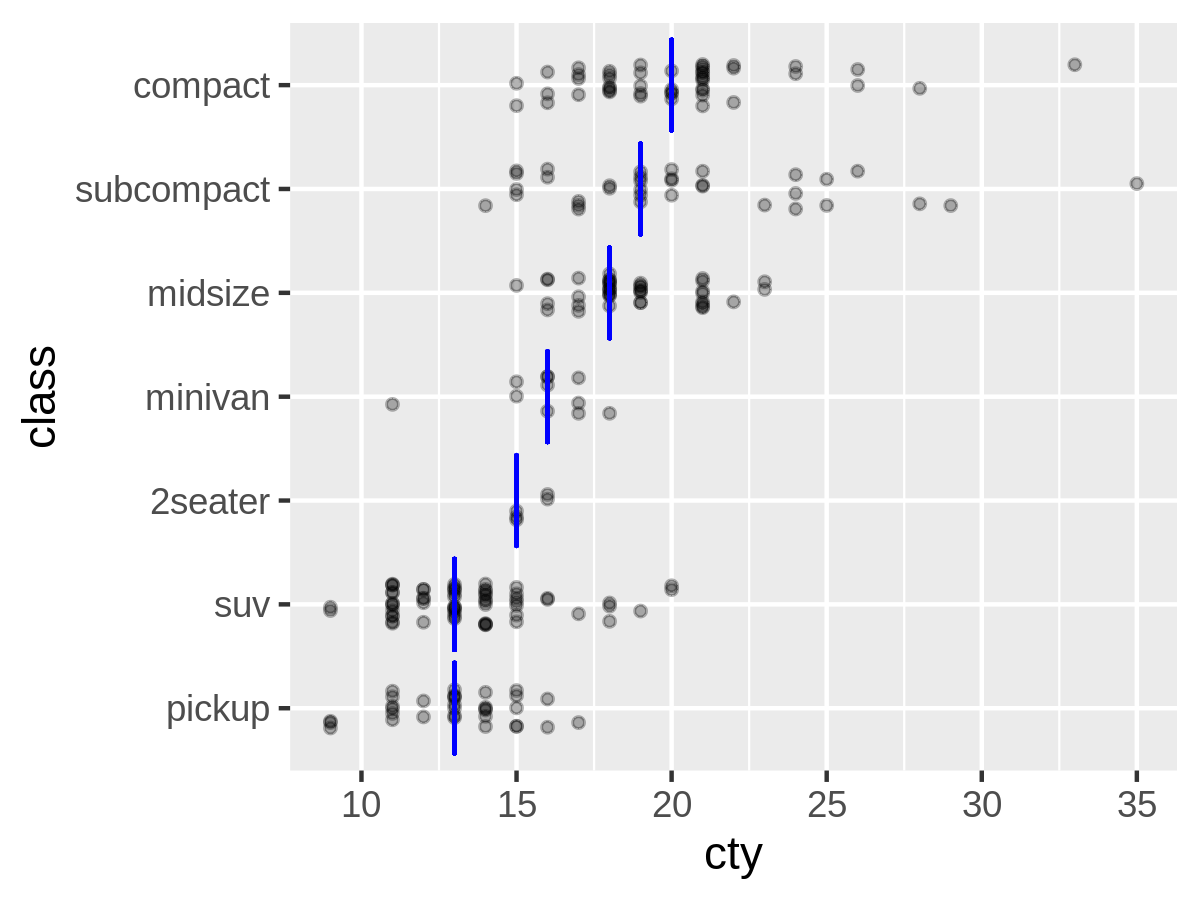

In [19]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)
ggplot(data = mpg_df) + 
  geom_point(aes(x = cty, y = class %>% #this reorder the class based on the median of the cty col
                                fct_reorder(cty, median)), position = position_jitter(h = 0.2, w = 0), alpha = 0.3, 
             size = 1) + 
  geom_crossbar(aes(x = median_city_mpg, y = class, xmin = median_city_mpg, xmax = median_city_mpg), 
                size = 0.2, color = "blue") + 
  labs(y = "class")